In [12]:
from Models.grid_search_utils import GridSearch as Gs
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore", "is_categorical_dtype")
warnings.filterwarnings("ignore", "use_inf_as_na")

EBMReg = Gs.load_model(name="../Models/GlassBox/ebm/saved_models/EBMReg")

In [13]:
test_set_with = pd.read_csv("../outputs/scores/0_dataset_ts.csv")
test_set_without = pd.read_csv("../outputs/scores/1_dataset_ts.csv")

In [14]:
test_result = test_set_with[["qId","kId"]].copy()
test_result["output_with"] = EBMReg.predict(test_set_with.iloc[:,5:].to_numpy())
test_result["output_without"] = EBMReg.predict(test_set_without.iloc[:,5:].to_numpy())

In [15]:
job_offer = test_result[test_result["qId"] == 18].iloc[:,1:].copy().set_index("kId")
job_offer = job_offer.sort_index()
job_offer["ax0"] = 0
job_offer["ax1"] = 1

In [16]:
job_offer["rank_with"] = job_offer["output_with"].rank(method="first", ascending=False)
job_offer["rank_without"] = job_offer["output_without"].rank(method="first", ascending=False)

In [17]:
job_offer["diff"] = job_offer["rank_without"] - job_offer["rank_with"]

In [18]:
job_offer = job_offer.sort_values(by="rank_with").head(15)

In [19]:
job_offer

,output_with,output_without,ax0,ax1,rank_with,rank_without,diff
kId,,,,,,,
1417,72.932861,70.312456,0,1,1.0,1.0,0.0
1394,72.895201,67.519978,0,1,2.0,3.0,1.0
1398,72.895201,69.133374,0,1,3.0,2.0,-1.0
1403,70.763722,65.550054,0,1,4.0,4.0,0.0
1390,68.210051,57.519696,0,1,5.0,8.0,3.0
1386,67.701908,52.435741,0,1,6.0,12.0,6.0
1416,67.694851,51.936238,0,1,7.0,13.0,6.0
1415,66.596656,57.519696,0,1,8.0,9.0,1.0
1423,64.434914,55.357954,0,1,9.0,10.0,1.0


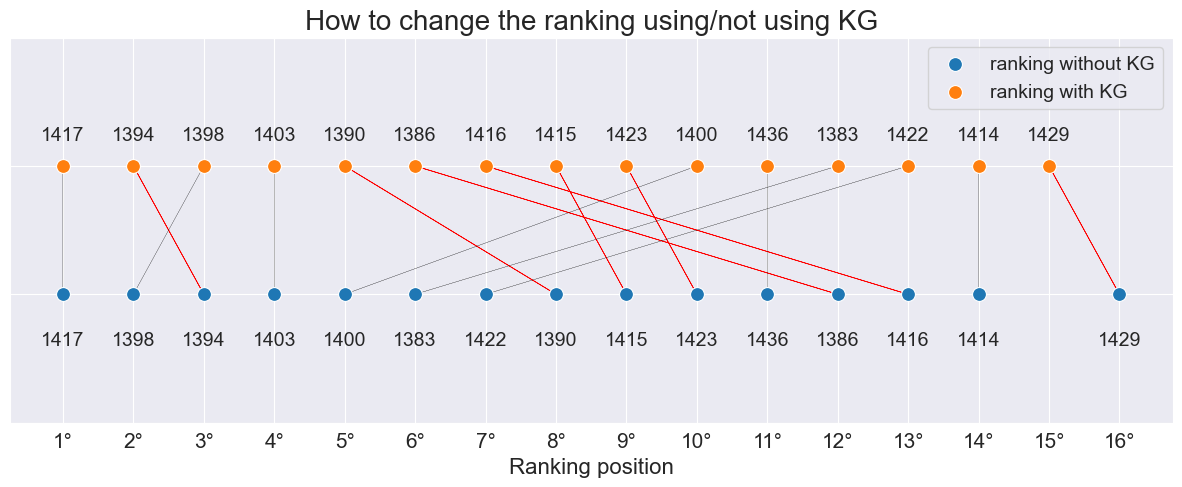

In [20]:
sns.set_style("darkgrid")

_, axs = plt.subplots(figsize=(15, 5))

for kId in job_offer.index:
    pred_without = job_offer.loc[kId,"rank_without"]
    pred_with = job_offer.loc[kId,"rank_with"]
    diff = job_offer.loc[kId,"diff"]
    axs.text(pred_without, job_offer.loc[kId, "ax0"] - 0.4, kId, horizontalalignment='center', size=14)
    axs.text(pred_with, job_offer.loc[kId, "ax1"] + 0.2, kId, horizontalalignment='center', size=14)
    
    color = "Red" if diff > 0 else "Black"
    line_width = 0.5 if diff > 0 else 0.08
    axs.arrow(pred_with,1, diff, -1, linewidth=line_width, color=color)
    
sns.scatterplot(y="ax0", x="rank_without", data=job_offer, s=100, ax=axs, label="ranking without KG")
sns.scatterplot(y="ax1", x="rank_with", data=job_offer, s=100, ax=axs, label="ranking with KG")

axs.set_yticks([-1,0,1,2])

last_pos = int(job_offer["rank_without"].max()) + 1
axs.set_xticks([*range(1,last_pos)],[str(i)+"°" for i in range(1,last_pos)])
axs.tick_params(axis='both', labelsize=15, labelleft=False)
axs.set_ylabel("")
axs.set_xlabel("Ranking position",fontsize=16)
axs.set_title("How to change the ranking using/not using KG", fontsize=20)
axs.grid(True)
axs.legend(fontsize=14)
plt.show()

In [21]:
display(test_set_without[test_set_without["kId"] == 1501].iloc[:,14:])
display(test_set_with[test_set_with["kId"] == 1501].iloc[:,14::])

,fitness_comp_basic,fitness_comp_sim_basic,fitness_comp_bonus,fitness_comp_sim_bonus,fitness_know_basic,fitness_know_sim_basic,fitness_know_bonus,fitness_know_sim_bonus
4355,0.0,0.0,0.0,0.0,0.25,0.0,0.0,0.0


,fitness_comp_basic,fitness_comp_sim_basic,fitness_comp_bonus,fitness_comp_sim_bonus,fitness_know_basic,fitness_know_sim_basic,fitness_know_bonus,fitness_know_sim_bonus
4355,0.25,0.25,0.0,0.25,1.0,0.0,0.0,0.5


In [22]:
curricula = pd.read_csv("../outputs/default_curricula.csv")
job_offer = pd.read_csv("../outputs/default_job_offers.csv")

In [23]:
curricula[curricula["kId"]==1501].iloc[0,7:21].to_dict()

{'Competences0': 'use information technology',
 'Competences1': 'prepare footwear prototypes',
 'Competences2': 'evaluate working time in production',
 'Competences3': 'coordinate and monitor employees',
 'Competences4': 'coordinate finishing room in footwear manufacturing',
 'Competences5': 'plan the productivity of the production of footwear and leather goods through calculations',
 'Competences6': 'apply footwear and leather goods quality control techniques',
 'Knowledge0': 'manual cutting processes for leather',
 'Knowledge1': 'application of health and safety regulations',
 'Knowledge2': 'footwear quality',
 'Knowledge3': "materials' properties, advantages and limitations in footwear manufacturing",
 'Knowledge4': 'footwear manufacturing technology',
 'Knowledge5': 'footwear components',
 'Knowledge6': '-'}

In [24]:
job_offer[job_offer["qId"]==18].iloc[:,8:22].to_dict()

{'Competence_essential0': {18: 'test mechatronic units'},
 'Competence_essential1': {18: 'synthesise information'},
 'Competence_essential2': {18: 'perform data analysis'},
 'Competence_essential3': {18: 'analyse test data'},
 'Competence_optional0': {18: 'provide technical documentation'},
 'Competence_optional1': {18: '-'},
 'Competence_optional2': {18: '-'},
 'Knowledge_essential0': {18: 'technical drawings'},
 'Knowledge_essential1': {18: 'mathematics'},
 'Knowledge_essential2': {18: 'computer engineering'},
 'Knowledge_essential3': {18: '-'},
 'Knowledge_optional0': {18: 'quality standards'},
 'Knowledge_optional1': {18: 'microelectromechanical systems'},
 'Knowledge_optional2': {18: '-'}}